# Fisher's Iris dataset

This data is taken from:
* Fisher,R.A. "The use of multiple measurements in taxonomic problems" Annual Eugenics, 7, Part II, 179-188 (1936); also in "Contributions to Mathematical Statistics" (John Wiley, NY, 1950).

<img src='data-sci-images/fisher-table-all.png' style='height:500px'>

# Grab the data

In [35]:
import pandas as pd

In [36]:
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv'
irisdf = pd.read_csv(path, header=None)
irisdf.columns = ['sepalLength','sepalWidth','petalLength','petalWidth','species']

In [37]:
irisdf

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Data Viz

## Matplotlib

<img src='data-sci-images/matplotlib-front.png'>

"Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.  Matplotlib makes easy things easy and hard things possible." -- [matplotlib.org](https://matplotlib.org/)

* Matplotlib was built on the NumPy and SciPy frameworks and initially made to enable interactive Matlab-like plotting via gnuplot from iPython

* Gained early traction with support from the Space Telescope Institute and JPL

* Easily one of the go-to libraries for academic publishing needs
  * Create publication-ready graphics in a range of formats
  * Powerful options to customize all aspects of a figure
  
* Matplotlib underlies the plotting capabilities of Pandas, Seaborn, and plotnine

<img src='data-sci-images/matplotlib-anatomy.png'>

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

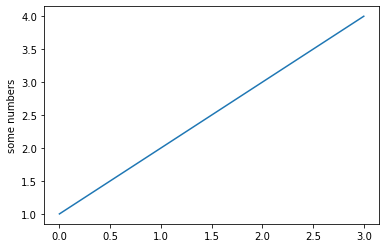

In [76]:
plt.plot([1,2,3,4])
plt.ylabel('some numbers')
plt.show()

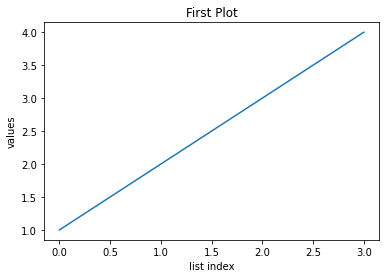

In [77]:
fig, ax = plt.subplots()

ax.plot([1,2,3,4])
ax.set(xlabel = 'list index', ylabel='values',title='First Plot')
plt.show()

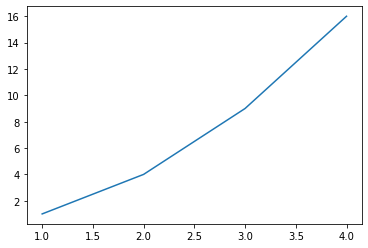

In [78]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])
plt.show()

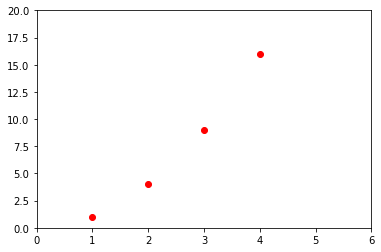

In [79]:
plt.plot([1,2,3,4], [1,4,9,16], 'ro')
plt.axis([0, 6, 0, 20])
plt.show()

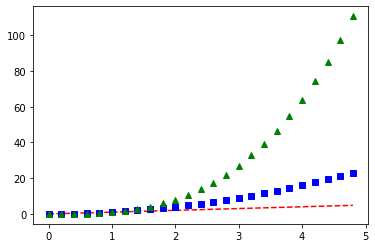

In [39]:
# a numerical array at evenly sampled intervals
t = np.arange(0., 5., 0.2)

# red dashes, blue squares and green triangles
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.show()

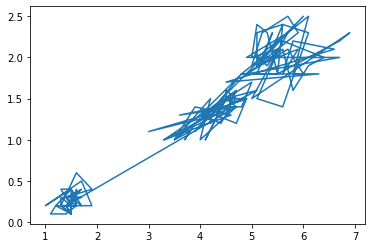

In [40]:
plt.plot(irisdf['petalLength'],irisdf['petalWidth'])

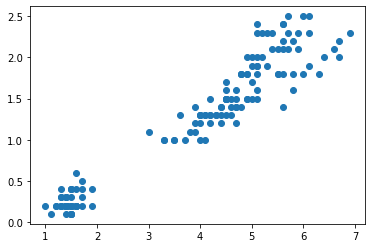

In [41]:
plt.scatter(irisdf['petalLength'],irisdf['petalWidth'])

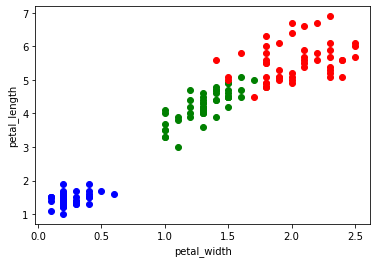

In [42]:
x1 = irisdf.loc[irisdf['species']=='Iris-setosa',('petalWidth')]
y1 = irisdf.loc[irisdf['species']=='Iris-setosa',('petalLength')]
x2 = irisdf.loc[irisdf['species']=='Iris-versicolor',('petalWidth')]
y2 = irisdf.loc[irisdf['species']=='Iris-versicolor',('petalLength')]
x3 = irisdf.loc[irisdf['species']=='Iris-virginica',('petalWidth')]
y3 = irisdf.loc[irisdf['species']=='Iris-virginica',('petalLength')]

plt.plot(figsize=(7, 6))

plt.scatter(x1,y1,c='blue')
plt.scatter(x2,y2,c='green')
plt.scatter(x3,y3,c='red')

plt.xlabel('petal_width')
plt.ylabel('petal_length')

plt.show()

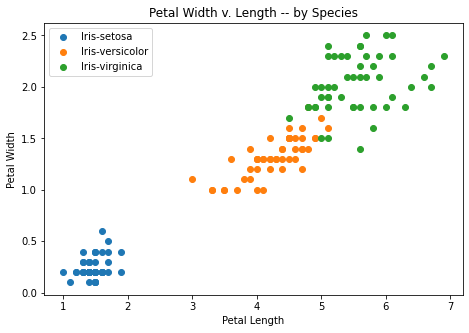

In [83]:
fig, ax = plt.subplots(1, 1, figsize=(7.5, 5))

for i, s in enumerate(irisdf.species.unique()):
    tmp = irisdf[irisdf.species == s]
    ax.scatter(tmp.petalLength, tmp.petalWidth,
               label=s)

ax.set(xlabel='Petal Length',
       ylabel='Petal Width',
       title='Petal Width v. Length -- by Species')

ax.legend(loc=2)
fig.show()

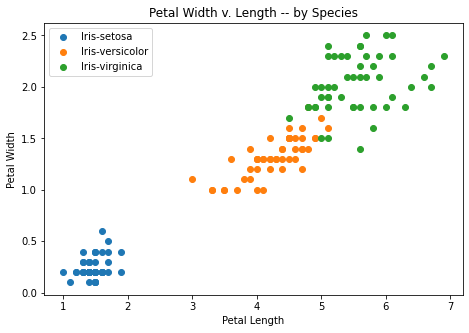

In [44]:
fig, ax = plt.subplots(1, 1, figsize=(7.5, 5))

def scatter(group):
    plt.plot(group['petalLength'],
             group['petalWidth'],
             'o', label=group.name)

irisdf.groupby('species').apply(scatter)

ax.set(xlabel='Petal Length',
       ylabel='Petal Width',
       title='Petal Width v. Length -- by Species')

ax.legend(loc=2)
fig.show()

# Pandas

Pandas has many convenient options for making plots

In [45]:
iriscolors = []
for i in irisdf.index:
    if irisdf.loc[i,'species'] == 'Iris-setosa':
        iriscolors.append('blue')
    if irisdf.loc[i,'species'] == 'Iris-versicolor':
        iriscolors.append('orange')
    if irisdf.loc[i,'species'] == 'Iris-virginica':
        iriscolors.append('green')

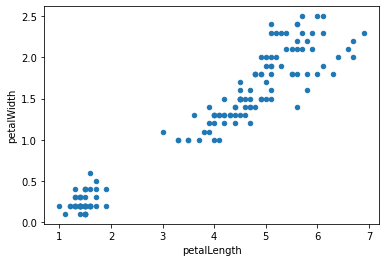

In [46]:
irisdf.plot.scatter(x='petalLength',y='petalWidth')

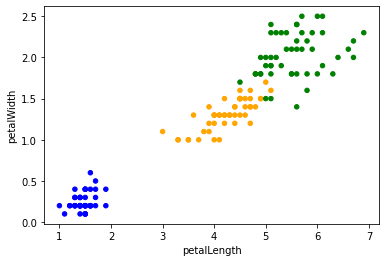

In [47]:
irisdf.plot.scatter(x='petalLength',y='petalWidth',c=iriscolors)

In [48]:
irisdf['species'].astype('category').cat.codes

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Length: 150, dtype: int8

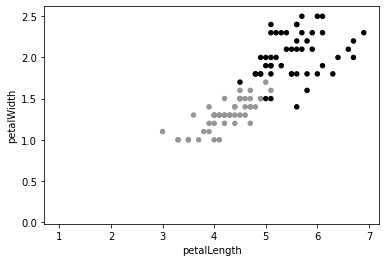

In [49]:
irisdf.plot.scatter(x='petalLength',
                    y='petalWidth',
                    c=irisdf['species'].astype('category').cat.codes)

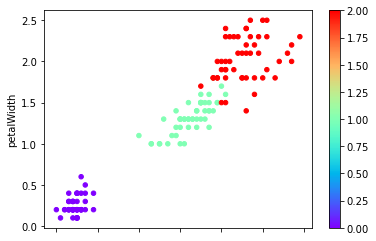

In [50]:
irisdf.plot.scatter(x='petalLength',
                    y='petalWidth',
                    c=irisdf['species'].astype('category').cat.codes,
                    cmap='rainbow')

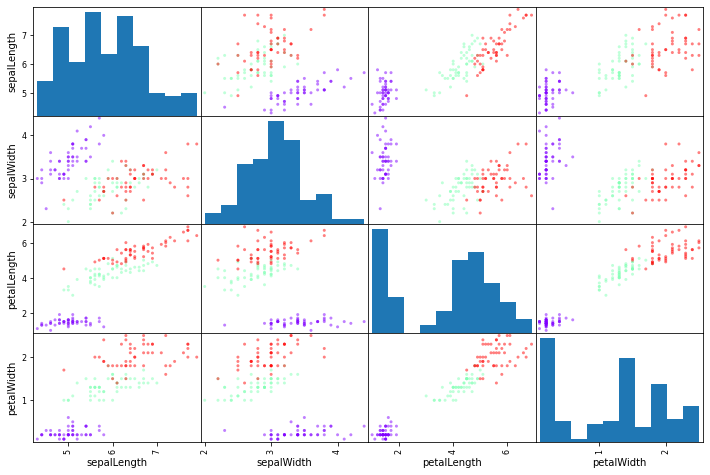

In [51]:
pd.plotting.scatter_matrix(irisdf.drop('species', axis=1), 
                           c=irisdf['species'].astype('category').cat.codes,
                           cmap='rainbow',
                           figsize=(12,8));

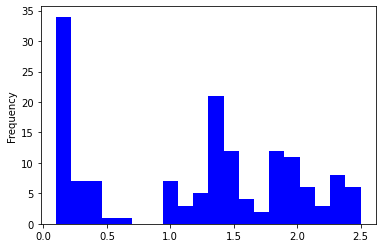

In [52]:
irisdf['petalWidth'].plot.hist(bins=20,color='blue')

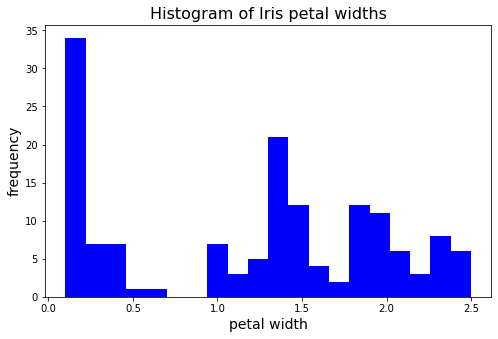

In [53]:
fig,ax = plt.subplots(figsize=(8,5))
ax = irisdf['petalWidth'].plot.hist(bins=20,color='blue')
ax.set_xlabel('petal width',fontsize=14)
ax.set_ylabel('frequency',fontsize=14)
ax.set_title('Histogram of Iris petal widths',fontsize=16)
plt.show()

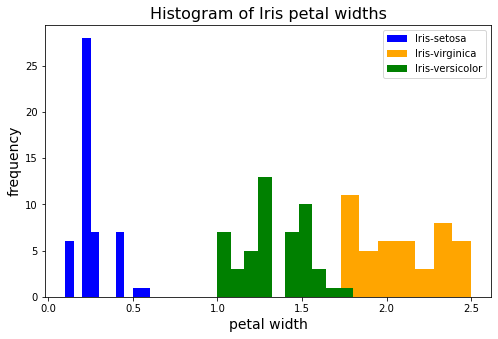

In [54]:
fig,ax = plt.subplots(figsize=(8,5))
ax = irisdf.loc[irisdf['species']=='Iris-setosa','petalWidth'].plot.hist(bins=10,color='blue')
ax = irisdf.loc[irisdf['species']=='Iris-virginica','petalWidth'].plot.hist(bins=10,color='orange')
ax = irisdf.loc[irisdf['species']=='Iris-versicolor','petalWidth'].plot.hist(bins=10,color='green')
ax.legend(['Iris-setosa','Iris-virginica','Iris-versicolor'])
ax.set_xlabel('petal width',fontsize=14)
ax.set_ylabel('frequency',fontsize=14)
ax.set_title('Histogram of Iris petal widths',fontsize=16)
plt.show()

# Seaborn

If Matplotlib 'tries to make easy things easy and hard things possible,' Seaborn tries to make a well-defined set of hard things easy too.

https://seaborn.pydata.org

<img src='data-sci-images/seaborn.png' width=700>
          
* Built on top of matplotlib and closely integrated with pandas data structures.
* Used for making statistical graphics and using visualization to quickly and easily explore and understand data.
* The style settings can also affect matplotlib plots, even if you don't make them with seaborn.

In [55]:
import seaborn as sns

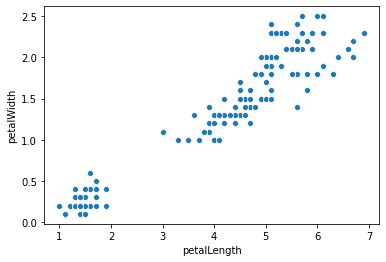

In [56]:
sns.scatterplot(irisdf.petalLength,
                irisdf.petalWidth);

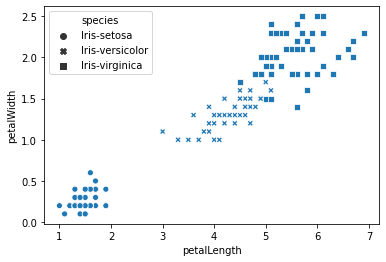

In [57]:
sns.scatterplot(irisdf.petalLength,
                irisdf.petalWidth,
                style=irisdf.species);

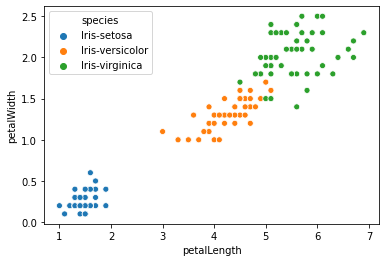

In [58]:
sns.scatterplot(irisdf.petalLength,
                irisdf.petalWidth,
                hue=irisdf.species);

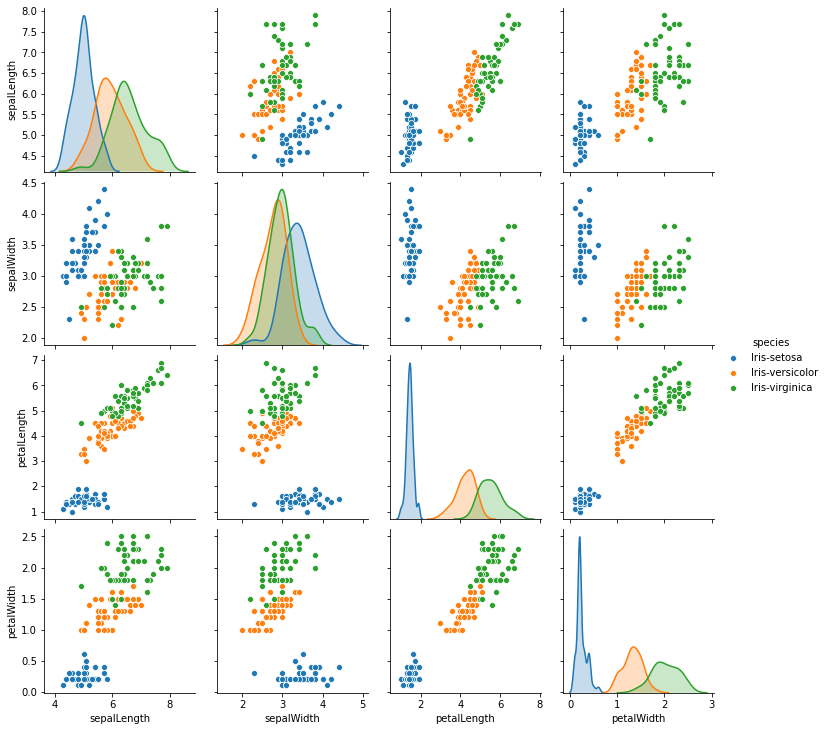

In [59]:
sns.pairplot(irisdf,hue='species');

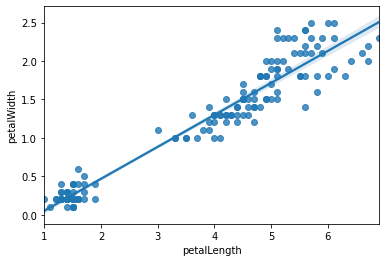

In [60]:
sns.regplot(x=irisdf.petalLength,
            y=irisdf.petalWidth);

# plotly

The plotly Python library (plotly.py) is an interactive, open-source, and browser-based graphing library.

https://plot.ly/python/

<img src='data-sci-images/plotly-1.png' width=700>

* An open-source product of Plotly, Inc., that is built on top of Javascript (plotly.js)
* Enables Python users to create beautiful interactive web-based visualizations that can be displayed in Jupyter notebooks, saved to standalone HTML files, or served as part of pure Python-built web applications using Dash
* Also has a version for R, as well as other web visualization products

In [84]:
import plotly.express as px

In [85]:
fig = px.scatter(irisdf, x='petalLength', y='petalWidth', color="species")
fig.show()

In [63]:
fig = px.scatter(irisdf, x='petalLength', y='petalWidth', color="species",
                 size='sepalLength', hover_data=['sepalWidth'])
fig.show()

In [64]:
px.scatter_3d(irisdf,x='petalLength',y='petalWidth',z='sepalLength',color='species')

# Altair

Altair is a declarative statistical visualization library for Python

https://altair-viz.github.io

<img src='data-sci-images/altair.png' width=700>

* Based on Vega and Vega-lite (high-level grammar of interactive graphics)
  * Vega-Lite provides a concise JSON syntax for rapidly generating visualizations to support analysis
  * Its specifications describe visualizations as mappings from data to properties of graphical marks
* Aims for elegant simplicity so the focus can be on understanding data

In [86]:
import altair

In [87]:
c = altair.Chart(irisdf).mark_point(filled=True).encode(
    x='petalLength',
    y='petalWidth',
    color='species'
)
c

alt.Chart(...)

In [88]:
bars = altair.Chart(irisdf).mark_bar().encode(
    x=altair.X('sepalLength',bin=altair.Bin(maxbins=20)),
    y='count()',
    color='species'
)
bars

alt.Chart(...)

In [89]:
c & bars

alt.VConcatChart(...)

In [90]:
my_si = altair.selection_interval()

In [91]:
c = altair.Chart(irisdf).mark_point(filled=True).encode(
    x='petalLength',
    y='petalWidth',
    color='species'
).add_selection(
    my_si
)

bars = altair.Chart(irisdf).mark_bar().encode(
    x=altair.X('sepalLength',
               bin=altair.Bin(maxbins=20),
               scale=altair.Scale(domain=(4, 8))),
    y='count()',
    color='species'
).transform_filter(
    my_si
)

c & bars

alt.VConcatChart(...)

In [96]:
c = altair.Chart(irisdf).mark_point(filled=True).encode(
    x='petalLength',
    y='petalWidth',
    color='species'
).add_selection(
    my_si
)

bars = altair.Chart(irisdf).mark_bar().encode(
    x=altair.X('sepalLength',
               bin=altair.Bin(maxbins=20),
               scale=altair.Scale(domain=(4, 8))),
    y=altair.Y('count()',
               scale=altair.Scale(domain=(0, 20))),
    color='species'
).transform_filter(
    my_si
)

c & bars

alt.VConcatChart(...)

In [94]:
c = altair.Chart(irisdf).mark_point(filled=True).encode(
    x='petalLength',
    y='petalWidth',
    color='species'
).add_selection(
    my_si
)

c2 = altair.Chart(irisdf).mark_point(filled=True).encode(
    x=altair.X('sepalLength',scale=altair.Scale(domain=(4,8))),
    y=altair.X('sepalWidth',scale=altair.Scale(domain=(1.5,5.0))),
    color='species'
).transform_filter(
    my_si
)

c & c2

alt.VConcatChart(...)

In [95]:
(c & c2).save('my1stAltair.html')

In [97]:
(c & bars).save('scatterPlusBar.html')